# 선형 회귀 모델 

## 1. 단변수 선형 회귀 (Univariate Linear Regression)

### 1) 정의
- 한 개의 변수로 결과를 예측 
- `단변수` : 피쳐(feature)가 하나인 선형회귀 
  - 예시 : 혈압으로 당뇨병 여부 예측 

### 2) 수식 
$$
y = wx + b
$$
  - $x,y$가 주어지고 $w,b$가 미지수 -> $w,b$를 추정 
    - $x,y$ : 데이터 값으로 주어짐 
    - $w,b$ : 찾아야함 

### 3) 가설과 비용함수 
#### 가설 (Hypothesis)
 $y = wx + b$ 
> 데이터를 예측하기 위해 사용하는 함수 

#### 비용함수 (Cost Fuction)
$$\text{Minimize } \sum_{i=1}^{n} (true - prediction)^2$$
> 가설이 얼마나 틀렸는지를 측정하는 함수
- 가설로 예측한 값(prediction) 과 실제 데이터 값(true) 값의 차이를 최소화 시켜 데이터를 가장 잘 표현한 함수
  

### 4) 선형회귀의 비용함수 - MSE(Mean Squared Error)
#### 정의
- 제곱 오차의 평균 

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_i - Y_i)^2$$

  - 오차를 구함 $\hat{y} - y$
  - 오차 제곱 $(\hat{y} - y)^2$
  - 제곱 오차의 평균 $\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2$

- 즉 `MSE`를 최소화 하는 $\theta (w), b$를 찾기 (optimize)

### 5) 선형회귀의 정확도(Accuracy) 측정

#### 평가 기준 - R2 Score
-  R2 Score는 선형회귀 모델의 성능을 평가하는 지표(=결정 계수)
- 결정계수 : 회귀식의 정확도 측정 
  - 0 ~ 1 사이의 값을 가지며, 1에 가까울수록 모델의 설명력이 높음을 의미
- 사이킷런 : `sklearn.metrics.r2_score`

#### 수식
$$R2 = 1 - (RSS / TSS)$$
- RSS(Residual Sum of Squares) : 잔차 제곱합
  - 예측에 대한 분산의 합 
  - $(\text{실측 값}-\text{예측 값})^2$ 의 합
- TSS(Total Sum of Squares) : 총 제곱합
  - $(\text{실측 값}-\text{평균 값})^2$ 의 합
$$R2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}= 1-\frac{\text{예측에 대한 분산의 합}}{{분산의 합}}$$


#### 평가기준 - RMSE
- 루트를 씌운 $MSE$
- 제곱 만큼 커진 것을 스케일을 줄임
  $$\text{RMSE} =\sqrt{ \frac{1}{n} \sum_{i=1}^{n} (\hat{Y}_i - Y_i)^2}$$



-----

### 6) 실습 : 당뇨병 데이터를 이용한 선형 회귀 

#### 실습 도구  설명

|구분|설명|
|---|---|
|Dataset|sklearn.datasets.load_diabetes()|
|Features|Scaling된 나이, 성별, 체질량지수, 혈압 6가지 혈청 수치|
|Target|1년 후 당뇨병 진행률|
|Model|linear_model.LinearRegression()|
|평가 지표|sklearn.metrics.mean_squared_error|


#### 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### 데이터셋 로드 
- `sklearn` 라이브러리에서 제공하는 `diabetes` 데이터셋을 로드

In [2]:
dia = datasets.load_diabetes()

#### 데이터셋 확인 하기

- 내장 데이터 셋 확인
  - 데이터 셋은 딕셔너리 형태로 구성되어 있음

- 특성 이름 확인 
  - ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
print(dia.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


- 데이터 모양 확인
  - 442개의 row 
  - 10개의 특성

In [4]:
print(dia.data.shape)

(442, 10)


- 타겟 정보 확인 
  - 442개의 타겟

In [5]:
print(dia.target.shape)

(442,)


#### 데이터셋 준비 
- 데이터프레임 생성
- 컬럼명 = dia.feature_names
- 데이터 = dia.data

In [6]:
df = pd.DataFrame(data=dia.data, columns=dia.feature_names)

- 데이터 확인

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


#### 단변수 선형회귀 데이터 생성 
- `bmi` 변수를 사용하여 단변수 선형회귀 모델을 생성
-  사이킷런의 경우 데이터를 `행렬(matrix)` 로 받음
-  하지만 데이터는 `벡터(vector)` 형태 
   -> reshape 을 통해서 행렬 형태로 만들어줌 

In [8]:
### X축 데이터 
### 행렬형태로 만들어줌
dia_X = df["bmi"].values.reshape(-1,1)

In [9]:
dia_X.shape

(442, 1)

##### 훈련데이터 셋과 테스트 데이터 셋으로 나누기 
- 일반적으로는 사이킷 런 함수를 사용하나 슬라이싱을 이용
- 마지막 20개만 테스트 데이터로 사용

- x데이터 생성

In [10]:
### 마지막 20개를 제외한 나머지는 훈련 데이터로 사용
dia_X_train = dia_X[:-20]

### 마지막 20개는 테스트 데이터로 사용
dia_X_test = dia_X[-20:]

In [11]:
dia_X_train.shape, dia_X_test.shape

((422, 1), (20, 1))

- y 데이터 생성

In [12]:
### 마지막 20개를 제외한 나머지는 훈련 데이터로 사용
dia_Y_train = dia.target[:-20]

### 마지막 20개는 테스트 데이터로 사용
dia_Y_test = dia.target[-20:]

In [13]:
dia_Y_train.shape, dia_Y_test.shape

((422,), (20,))

#### sklearn의 선형회귀 모델  학습

- 선형 회귀모델 객체 생성

In [14]:
regr = linear_model.LinearRegression()

- 훈련 데이터 학습 (fit(데이터,타겟))

In [15]:
regr.fit(dia_X_train, dia_Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


- 훈련이 완료되었기 때문에 절편과 기울기를 알 수 있음 
  - 기울기 : `coef_`
  - 절편 : `intercept_`

In [16]:
print("기울기 : ", regr.coef_  )
print("절편 : ", regr.intercept_  )

기울기 :  [938.23786125]
절편 :  152.91886182616113


#### 예측 수행 
- 테스트 데이터를 이용해서 예측 수행

In [17]:
y_pred = regr.predict(dia_X_test)

print("예측 값 : ", y_pred)

print("실제 값 : ", dia_Y_test)

예측 값 :  [225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]
실제 값 :  [233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


#### 시각화를 통한 데이터 비교

- 실제 데이터는 검은색 점
- 예측된 직선은 파란색 선

Text(0, 0.5, 'disease progression')

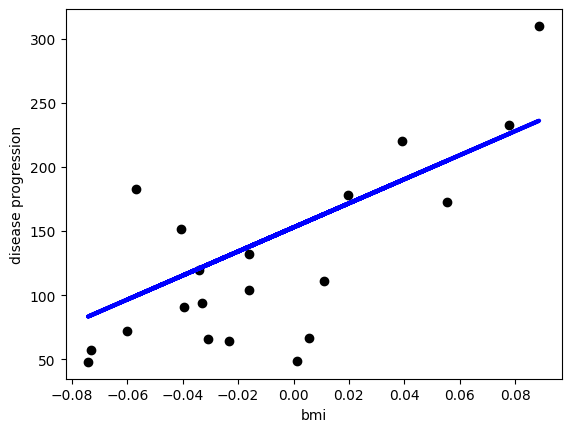

In [19]:
plt.scatter(dia_X_test, dia_Y_test, color='black',label='actual data')
plt.plot(dia_X_test, y_pred, color='blue', linewidth=3, label='predicted line')
plt.xlabel("bmi")
plt.ylabel("disease progression")

#### R2 계산

- R2 score 계산

In [20]:
r2_socre = r2_score(dia_Y_test, y_pred)
print("R2 score : ", r2_socre)

R2 score :  0.47257544798227147


- MSE 계산

In [21]:
print("MSE : ", mean_squared_error(dia_Y_test, y_pred))

MSE :  2548.07239872597


-----

#### 다변수 선형회귀 실습 (Multiple Linear Regression) 

- bmi 와 bp를 이용한 선형 회귀 
- bp에 대한 데이터 생성
- 변수가 2개가 되면 자동으로 행렬(매트릭스) -> `reshape`이 필요 없음

In [23]:
dia_X = df[["bmi", "bp"]].values
dia_X.shape

(442, 2)

- 훈련데이터 셋과 테스트 데이터 셋으로 나누기 
- 마지막 20개만 테스트 데이터로 사용

- x데이터 생성

In [24]:
### 마지막 20개를 제외한 나머지는 훈련 데이터로 사용
dia_X_train = dia_X[:-20]

### 마지막 20개는 테스트 데이터로 사용
dia_X_test = dia_X[-20:]

In [25]:
dia_X_train.shape, dia_X_test.shape

((422, 2), (20, 2))

- y 데이터 생성

In [26]:
### 마지막 20개를 제외한 나머지는 훈련 데이터로 사용
dia_Y_train = dia.target[:-20]

### 마지막 20개는 테스트 데이터로 사용
dia_Y_test = dia.target[-20:]

In [27]:
dia_Y_train.shape, dia_Y_test.shape

((422,), (20,))

- 선형 회귀모델 객체 생성

In [28]:
regr = linear_model.LinearRegression()

- 훈련 데이터 학습 (fit(데이터,타겟))

In [29]:
regr.fit(dia_X_train, dia_Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


- 훈련이 완료되었기 때문에 절편과 기울기를 알 수 있음 
  - 기울기 : `coef_`
  - 절편 : `intercept_`

In [30]:
print("기울기 : ", regr.coef_  )
print("절편 : ", regr.intercept_  )

기울기 :  [781.17242861 410.14389103]
절편 :  152.86283988723363


- 테스트 데이터를 이용해서 예측 수행

In [31]:
y_pred = regr.predict(dia_X_test)

print("예측 값 : ", y_pred)

print("실제 값 : ", dia_Y_test)

예측 값 :  [235.36697546 133.70920418 153.51228658  87.68118965 144.03322796
 154.95075839 257.90718917 117.5799822   87.76041218 137.62073219
 193.68078385  93.70692672 157.23118727 118.0972744   74.28909897
 192.72542198 112.69445956 147.53008573 183.87555632  62.42247739]
실제 값 :  [233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


- R2 score 계산

In [32]:
print("MSE : ", mean_squared_error(dia_Y_test, y_pred))

MSE :  2582.7550265018695


- MSE 계산

In [33]:
print("MSE : ", mean_squared_error(dia_Y_test, y_pred))

MSE :  2582.7550265018695
